In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-23 19:00:00,597 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-23 19:00:04,350 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [6]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [7]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [9]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[0] > 1000:
    tof_time_list = tof_time_list/1000
    pwm_time_list = pwm_time_list/1000

In [10]:
print(tof_data_list)
print(tof_time_list)
print(pwm_data_list)
print(pwm_time_list)

[2019, 2011, 2008, 2001, 1968, 1934, 1881, 1846, 1799, 1742, 1672, 1612, 1506, 1415, 1304, 1218, 1122, 1025, 926, 821, 716, 612, 520, 449, 391, 344, 306, 283, 269, 262, 264, 265, 267, 268, 272, 275, 280, 286, 292]
[0, 65, 136, 205, 267, 331, 396, 462, 526, 588, 651, 715, 781, 848, 911, 975, 1037, 1102, 1166, 1232, 1301, 1378, 1446, 1510, 1576, 1641, 1710, 1774, 1840, 1905, 1971, 2037, 2113, 2179, 2249, 2317, 2381, 2447, 2508]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 65, 136, 205, 267, 331, 396, 462, 526, 588, 651, 715, 781, 848, 911, 975, 1037, 1102, 1166, 1232, 1301, 1378, 1446, 1510, 1576, 1641, 1710, 1774, 1840, 1905, 1971, 2037, 2113, 2179, 2249, 2317, 2381, 2447, 2508]


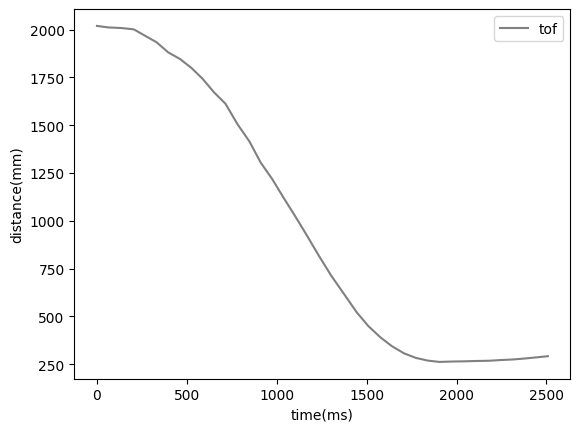

In [11]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

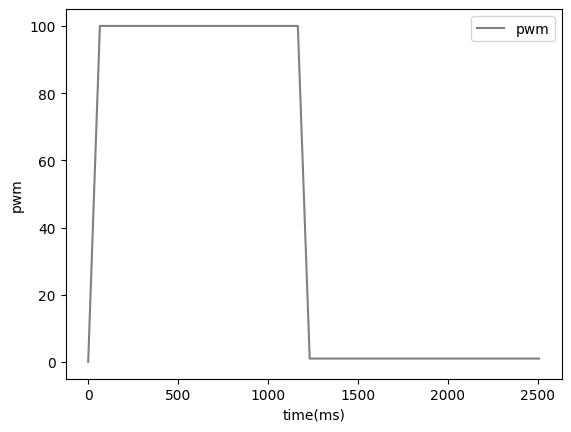

In [12]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

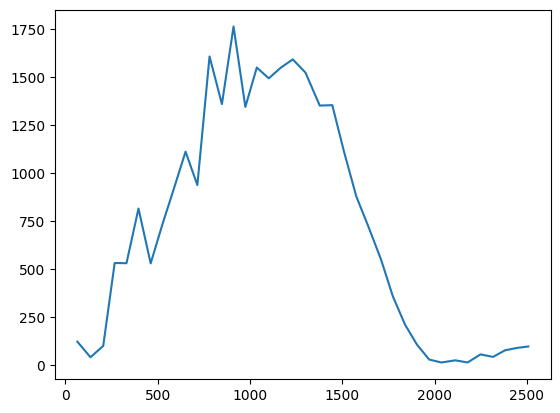

2023-03-23 19:01:30,515 | INFO     |: Disconnected from C0:83:b1:6a:38:3C


In [13]:
delta = abs(np.diff(tof_data_list)/np.diff(tof_time_list)) * 1000
plt.plot(tof_time_list[1:], delta)